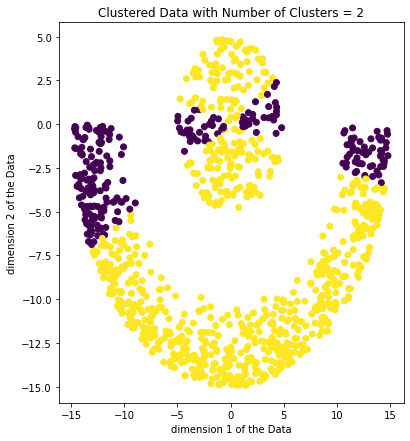

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

X = np.genfromtxt("cm_dataset_2.csv", delimiter=',')


X = X.T

Size = X.shape[1]


def polyKernel(x,y,d):
    funxTy=(1+x.transpose()@y)
    return funxTy**d

def getKernelComponentsPolynomial(X,d):
     
    size = X.shape[1]
    N = np.full((size , size), 1/size)
    KernelMatrix = np.zeros((size,size))
    
    for i in range(size):
        for j in range(size):
            KernelMatrix[i,j] = polyKernel(X[:,i],X[:,j],d)

    KernelMatrixCentered = KernelMatrix - N@KernelMatrix - KernelMatrix@N + N@KernelMatrix@N
    eigenValue,eigenVector = np.linalg.eig(KernelMatrixCentered)

    eigenValue=eigenValue.real 
    eigenVector = eigenVector.real

    sortedEigenValues=np.flip(eigenValue.argsort())
    sortedEigenVector = eigenVector[:,sortedEigenValues]
    
    calcLamda=((np.abs(eigenValue))**0.5)
    sortedEigenVector = sortedEigenVector/calcLamda

    kernelSortEV=sortedEigenVector[:,0:2]
    kernel_comps = KernelMatrixCentered.T@(kernelSortEV);
    kernel_comps=kernel_comps.transpose();
                    

    return kernel_comps

 


def llyodsAlgorithm(X,K,muRandom=None,max_iter=1000):
     
    Size = X.shape[1]
    
    ZReassigned = np.zeros(Size,dtype=np.uint8)
          
    
    muRandom = X[:,np.random.randint(0,X.shape[1],K)]  
    muList = muRandom.copy()

   

         
    for i in range(Size):
            
        ZReassigned[i] = np.argmin(((X[:,i:i+1]-muList)**2).sum(axis=0))
 
    
     
    return ZReassigned




def spectralClustering(X,d,num_clusters=2):
      size = X.shape[1]
      N = np.full((size , size), 1/size)
      KernelMatrix = np.zeros((size,size))
      
      for i in range(size):
          for j in range(size):
              KernelMatrix[i,j] = polyKernel(X[:,i],X[:,j],d)

      
      eigenValue,eigenVector = np.linalg.eig(KernelMatrix)

      eigenValue=eigenValue.real 
      eigenVector = eigenVector.real

      sortedEigenValues=np.flip(eigenValue.argsort())
      sortedEigenVector = eigenVector[:,sortedEigenValues]

      HCalculate=sortedEigenVector.copy()
      HCalculate=HCalculate[:,:num_clusters].transpose()
      ZReassigned = llyodsAlgorithm(HCalculate,K=2)
     

      HNorm=np.linalg.norm(HCalculate,axis=0).reshape(-1,size)
      HStarCalculate=HCalculate/HNorm
    
     
      

      return HCalculate,HStarCalculate,ZReassigned



def displayClustered(X,ZReassigned):
  
    plt.subplot(1,3,2)
    plt.xlabel("dimension 1 of the Data")
    plt.ylabel("dimension 2 of the Data")
    plt.scatter(X[0],X[1],c=ZReassigned)
  
    
    plt.title("Clustered Data with Number of Clusters = 2")
     




def displayResults(X,ZReassigned):

    plt.figure(figsize=(21,7))

  
    displayClustered(X,ZReassigned)
  

    plt.show()


 

 
HCalculate,HStarCalculate,ZReassigned = spectralClustering(X,2,2)
 

print()
Z = HStarCalculate[:,:].argmax(axis=0) 
displayResults(X,Z)

 